In [76]:
from utils.files import getDF
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Fontconfig warning: ignoring UTF-8: not a valid region tag


# 載入 ratings 和 metadata
1. 匯入資料
2. 整理資料格式

[推薦系統的範例程式 | Data & AI - 推薦系統 RecSys | Lighthouse](https://lighthouse.alphacamp.co/courses/125/units/26790)

In [2]:
all_beauty_path = 'data/All_Beauty.csv'
ratings = pd.read_csv(
    all_beauty_path,
    names=["asin", "reviewerID", "overall", "unixReviewTime"],
    dtype={"asin": np.str_, "reviewerID": np.str_, "overall": np.float32, "unixReviewTime": np.float64 }
)

In [3]:
meta_all_beauty_path = 'data/meta_All_Beauty.json.gz'
metadata = pd.read_json(
    meta_all_beauty_path,
    lines=True,
    compression="gzip"
)
# OR
# meta_all_beauty_df = getDF('data/meta_All_Beauty.json.gz')

In [4]:
ratings['DATE'] = pd.to_datetime(ratings['unixReviewTime'], unit='s')


In [5]:
ratings

,asin,reviewerID,overall,unixReviewTime,DATE
0,0143026860,A1V6B6TNIC10QE,1.0,1.424304e+09,2015-02-19
1,0143026860,A2F5GHSXFQ0W6J,4.0,1.418861e+09,2014-12-18
2,0143026860,A1572GUYS7DGSR,4.0,1.407629e+09,2014-08-10
3,0143026860,A1PSGLFK1NSVO,5.0,1.362960e+09,2013-03-11
4,0143026860,A6IKXKZMTKGSC,5.0,1.324771e+09,2011-12-25
...,...,...,...,...,...
371340,B01HJEGTYK,A202DCI7TV1022,1.0,1.500509e+09,2017-07-20
371341,B01HJEGTYK,A3FSOR5IJOFIBE,5.0,1.489622e+09,2017-03-16
371342,B01HJEGTYK,A1B5DK6CTP2P24,5.0,1.488326e+09,2017-03-01
371343,B01HJEGTYK,A23OUYS5IRMJS9,2.0,1.487635e+09,2017-02-21


In [6]:
metadata

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
0,[],,[Loud 'N Clear Personal Sound Amplifier allows...,,Loud 'N Clear&trade; Personal Sound Amplifier,[],,idea village,[],"2,938,573 in Beauty & Personal Care (",[],{'ASIN: ': '6546546450'},All Beauty,,,,6546546450,[],[]
1,[],,[No7 Lift & Luminate Triple Action Serum 50ml ...,,No7 Lift &amp; Luminate Triple Action Serum 50...,"[B01E7LCSL6, B008X5RVME]",,,[],"872,854 in Beauty & Personal Care (",[],"{'Shipping Weight:': '0.3 ounces (', 'ASIN: ':...",All Beauty,"class=""a-bordered a-horizontal-stripes a-spa...",,$44.99,7178680776,[],[]
2,[],,[No7 Stay Perfect Foundation now stays perfect...,,No7 Stay Perfect Foundation Cool Vanilla by No7,[],,No7,[],"956,696 in Beauty & Personal Care (","[B01B8BR0O8, B01B8BR0NO, B014MHXXM8]","{'Shipping Weight:': '3.5 ounces (', 'ASIN: ':...",All Beauty,,,$28.76,7250468162,[],[]
3,[],,[],,Wella Koleston Perfect Hair Colour 44/44 Mediu...,[B0041PBXX8],,,[],"1,870,258 in Beauty & Personal Care (",[],"{' Item Weight: ': '1.76 ounces', 'Sh...",All Beauty,,,,7367905066,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
4,[],,[Lacto Calamine Skin Balance Daily Nourishing ...,,Lacto Calamine Skin Balance Oil control 120 ml...,[],,Pirmal Healthcare,[],"67,701 in Beauty & Personal Care (","[3254895630, B007VL1D9S, B00EH9A0RI, B0773MBG4...","{'Shipping Weight:': '12 ounces (', 'ASIN: ': ...",All Beauty,,,$12.15,7414204790,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32887,[],,[],,"Barielle Pro Textured Grip Cuticle Nipper, Purple",[],,,[],"2,145,325 in Beauty & Personal Care (",[],{'ASIN: ': 'B01HIWLLUK'},All Beauty,,,$9.95,B01HIWLLUK,[],[]
32888,[],,[],,(Buy 3 Get 1 Free) Salon Perfect Eye Makeup Co...,[],,Salon Perfect,[],"1,639,713 in Beauty & Personal Care (",[],"{'ASIN: ': 'B01HJ1K3YK', 'UPC:': '671635851871'}",All Beauty,,,,B01HJ1K3YK,[],[]
32889,[],,[],,NOW D-Mannose 500 mg - 120 Veg Capsules (Pack ...,"[B01KON9B4S, B079X3YFXS, B00M79OYS6, B000JN4CR...",,,[],"207,410 in Beauty & Personal Care (","[B01KON9B4S, B000JN4CR0, B071ZHMRHS, B01HJ84TN...","{'Shipping Weight:': '1 pounds (', 'ASIN: ': '...",All Beauty,,,$55.63,B01HJ84SGM,[],[]
32890,[],,[Brand new and high quality<br> Enables fast v...,,12 White Feather Shuttlecocks Birdies Badminto...,[],,GBSTORE,[],"965,673 in Beauty & Personal Care (",[],"{'Shipping Weight:': '4.8 ounces (', 'ASIN: ':...",All Beauty,,,$12.99,B01HJASD20,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...


# 資料切分
3. 資料切分

In [7]:
# 真實被購買的商品資料（2018-09-01 以前資料）
ratings_trainings = ratings[
    (ratings['DATE'] < '2018-09-01')
]

# 真實被購買的商品資料（2018-09-01 - 2018-09-30 的資料）
ratings_testings = ratings[
    (ratings['DATE'] >= '2018-09-01') &
    (ratings['DATE'] <= '2018-09-30')
]

In [8]:
ratings_trainings

,asin,reviewerID,overall,unixReviewTime,DATE
0,0143026860,A1V6B6TNIC10QE,1.0,1.424304e+09,2015-02-19
1,0143026860,A2F5GHSXFQ0W6J,4.0,1.418861e+09,2014-12-18
2,0143026860,A1572GUYS7DGSR,4.0,1.407629e+09,2014-08-10
3,0143026860,A1PSGLFK1NSVO,5.0,1.362960e+09,2013-03-11
4,0143026860,A6IKXKZMTKGSC,5.0,1.324771e+09,2011-12-25
...,...,...,...,...,...
371340,B01HJEGTYK,A202DCI7TV1022,1.0,1.500509e+09,2017-07-20
371341,B01HJEGTYK,A3FSOR5IJOFIBE,5.0,1.489622e+09,2017-03-16
371342,B01HJEGTYK,A1B5DK6CTP2P24,5.0,1.488326e+09,2017-03-01
371343,B01HJEGTYK,A23OUYS5IRMJS9,2.0,1.487635e+09,2017-02-21


In [289]:
# userID -> asin list
ratings_testings_by_user = ratings_testings.groupby('reviewerID').agg(list).reset_index()[['reviewerID', 'asin']].to_dict('records')
ratings_testings_by_user = { rating['reviewerID']: rating['asin'] for rating in ratings_testings_by_user }
ratings_testings_by_user

{'A100XQFWKQ30O2': ['B01DKQAXC0'],
 'A103T1QOGFCSEH': ['B01DKQAXC0'],
 'A106UKKSJ2KXPF': ['B01ENS6XDC'],
 'A10A7GV4D5A11V': ['B01BFSNF66'],
 'A1119JJ37ZLB8R': ['B01CJNZKZK'],
 'A113UOOLBSZN52': ['B01EKY0M22'],
 'A12M4U7WK4ALCR': ['B01DKQAXC0'],
 'A12T8YTW6VWT7S': ['B01G53GFKO'],
 'A1364JXGKB46MM': ['B01GLA54SA'],
 'A137DALOQFKBTI': ['B01AWXGD3M'],
 'A13FEZ3WV7S2EY': ['B01BHN3EHE'],
 'A13IV4I1B0RXMG': ['B01DKQAXC0'],
 'A13JU88JAHN72I': ['B017I6B6GK'],
 'A13K55R6VH1OOD': ['B01FNJ9MOW'],
 'A13P7VFU075A': ['B01H3ZQ2NI'],
 'A13SWYE4QLB6NG': ['B01DVLHVPQ'],
 'A13ZTQ0Q4ATA41': ['B01AE1TJV0'],
 'A142EDN04OD62U': ['B01CW24JXC'],
 'A142I22FIC8MZK': ['B01CD7JK9E'],
 'A14834QTII5TLT': ['B01GK8P0CS'],
 'A14A447VPACTBC': ['B01B3R5EFO'],
 'A14AP6MN5XO6LB': ['B01E7UKR38'],
 'A14CLF25IX25US': ['B01DLR9IDI'],
 'A14LYXC3HTBAHI': ['B01FT6TMQM'],
 'A14VUW4KZ34EOE': ['B01DKQAXC0'],
 'A14Y32P26G9YL': ['B018WCT01C'],
 'A157T25PBS7MX4': ['B01CX5KCIE'],
 'A15HZDSERD85C8': ['B01DDWA5II'],
 'A15JJ8J1FGADIX': ['B0

In [290]:
# userID list
users = list(ratings_testings_by_user.keys())
users

['A100XQFWKQ30O2',
 'A103T1QOGFCSEH',
 'A106UKKSJ2KXPF',
 'A10A7GV4D5A11V',
 'A1119JJ37ZLB8R',
 'A113UOOLBSZN52',
 'A12M4U7WK4ALCR',
 'A12T8YTW6VWT7S',
 'A1364JXGKB46MM',
 'A137DALOQFKBTI',
 'A13FEZ3WV7S2EY',
 'A13IV4I1B0RXMG',
 'A13JU88JAHN72I',
 'A13K55R6VH1OOD',
 'A13P7VFU075A',
 'A13SWYE4QLB6NG',
 'A13ZTQ0Q4ATA41',
 'A142EDN04OD62U',
 'A142I22FIC8MZK',
 'A14834QTII5TLT',
 'A14A447VPACTBC',
 'A14AP6MN5XO6LB',
 'A14CLF25IX25US',
 'A14LYXC3HTBAHI',
 'A14VUW4KZ34EOE',
 'A14Y32P26G9YL',
 'A157T25PBS7MX4',
 'A15HZDSERD85C8',
 'A15JJ8J1FGADIX',
 'A15ZCL70JXXH89',
 'A1617KN2IAWZ6J',
 'A16E0O88262HKA',
 'A16NSZ58PTVIYF',
 'A16UGDXRTDLJG5',
 'A16X9HR3UFQQXY',
 'A16Y7V1CZCWKFV',
 'A174YOBOSW9WDN',
 'A1786SKRAJXH86',
 'A17K2BUZ20WD2',
 'A17LYRFV645L0V',
 'A18LNGVXDZBTUR',
 'A19503XX7GU6J2',
 'A19HVHRZDYFEOP',
 'A19JM38B861BO4',
 'A19KGY3W1P0MHT',
 'A19KJPOF3QOJ24',
 'A19U5RT4Q8Q1T6',
 'A1AQNQUNX8B6JT',
 'A1ARU0IN6RUFFD',
 'A1BB4635KSKDMV',
 'A1BCC7X6KRTBG0',
 'A1BPJ56BXENC7',
 'A1C0RI6W65FC8B'

# 產生推薦結果
4. 產生推薦結果

利用切分好的訓練資料（也就是最後一個月以前的資料）用來學習模式，產生「最後一個月推薦給使用者的商品」作為我們預測的推薦資料。
在這個過程中，會指定輸入的資料會包含：

* 訓練資料(`ratings_trainings`, `ratings_trainings`)：歷史行為與商品資訊（All_Beauty.csv / meta_All_Beauty.json.gz）
* 使用者列表(`users`)：需要被推薦的使用者清單
* Top-K：每一個使用者需要推薦幾個商品數

而最後需要輸出的資料是「需要被推薦的使用者分別推薦哪 k 個商品」

In [311]:
def recommender(training_data, users=[], k=10):
    """
    * training_data: dataframe 輸入的訓練資料集（2018-09-01 以前資料）
    * users: [] 需要被推薦的使用者
    * k: int 每個使用者需要推薦的商品數
    * recommendations: dict
      {
          使用者一： [推薦商品一, 推薦商品二, ...],
          使用者二： [...], ...
      }
    """
    recommendations = {}
    '''
    Your Code
    '''


    '''
    random-based
    '''
    ratings_trainings = training_data
    recommendations = {user: ratings_trainings['asin'].sample(n=k).tolist() for user in users}
    return recommendations
ratings_by_user = recommender(ratings_trainings, users)
ratings_by_user

{'A100XQFWKQ30O2': ['B015DUSZ80',
  'B0017TZD7S',
  'B000FEF1V4',
  'B001LNODUS',
  'B01BPGD8TW',
  'B005C18UTK',
  'B00O3097YI',
  'B013W4YFTW',
  'B01HD23OJG',
  'B000FED5DU'],
 'A103T1QOGFCSEH': ['B0091OCDRE',
  'B000YB70PS',
  'B015DQ096A',
  'B00MXQ7E94',
  'B00016WU6A',
  'B00Z5EHZHW',
  'B00DYIEIVC',
  'B001QY8QXM',
  'B014O9D2J8',
  'B01CM1RW4G'],
 'A106UKKSJ2KXPF': ['B002RTXI7O',
  'B00IHGV2Y2',
  'B00VV5ZGCK',
  'B00STUUTHW',
  'B009PIJV1W',
  'B01B57QJHY',
  'B001QY8QXM',
  'B01DW533VM',
  'B007FAOQF8',
  'B0002W09UC'],
 'A10A7GV4D5A11V': ['B001LOJ2BW',
  'B005V3AV5U',
  'B0067F28ZW',
  'B00VF344X0',
  'B0195R1FT8',
  'B00HNR5I46',
  'B004A7NXG2',
  'B00MXQ7E94',
  'B0018OVL4G',
  'B015ZOWER2'],
 'A1119JJ37ZLB8R': ['B01FGA2X30',
  'B005JF3P26',
  'B00VV5ZGCK',
  '1620213982',
  'B00G5L867C',
  'B00LPD1OUQ',
  'B001QY8QXM',
  'B007Z5RTRK',
  'B012FRQQC6',
  'B01B18T01Y'],
 'A113UOOLBSZN52': ['B01C5CXHYG',
  'B00NV702XO',
  'B00BHXAWX4',
  'B018MU7JHQ',
  'B00GTYBBTA',
  'B012

# 結果評估
5. 結果評估
最後我們會利用最後一個月的「真實購買資料」（也就是測試資料集）對「推薦給使用者的商品」進行評估，用來衡量該模型好不好。
這裡我們採用的是 Recall 的評估機制，也就是檢查*「使用者真正會購買的商品中」*，有哪些會出現在*「推薦給使用者的商品中裡」*。
```
FP  |  TP
FN  |  TN
```

```
使用者沒有買，在推薦的商品        |  使用者真的有買的，推薦的商品中
使用者真的有買的，不在推薦的商品中  |  使用者沒有買，不在推薦的商品中
```


In [312]:
def evaluate(ratings_testings_by_user={}, ratings_by_user={}, method=None):
    """
    * ratings_testings_by_user: dict 真實被購買的商品資料（2018-09-01 以後資料）
    * ratings_by_user: dict 利用訓練資料學習的推薦商品
    * method: str
    * score: float
    """
    total = 0
    for user_id in ratings_testings_by_user:
        if user_id in ratings_by_user: # 只計對有購買者
            total += len(set(ratings_by_user[user_id]) & set(ratings_testings_by_user[user_id]))
    score = total / len(ratings_testings)
    return score
evaluate(ratings_testings_by_user, ratings_by_user)


0.013559322033898305

# 分析品牌次數分佈

In [21]:
metadata

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
0,[],,[Loud 'N Clear Personal Sound Amplifier allows...,,Loud 'N Clear&trade; Personal Sound Amplifier,[],,idea village,[],"2,938,573 in Beauty & Personal Care (",[],{'ASIN: ': '6546546450'},All Beauty,,,,6546546450,[],[]
1,[],,[No7 Lift & Luminate Triple Action Serum 50ml ...,,No7 Lift &amp; Luminate Triple Action Serum 50...,"[B01E7LCSL6, B008X5RVME]",,,[],"872,854 in Beauty & Personal Care (",[],"{'Shipping Weight:': '0.3 ounces (', 'ASIN: ':...",All Beauty,"class=""a-bordered a-horizontal-stripes a-spa...",,$44.99,7178680776,[],[]
2,[],,[No7 Stay Perfect Foundation now stays perfect...,,No7 Stay Perfect Foundation Cool Vanilla by No7,[],,No7,[],"956,696 in Beauty & Personal Care (","[B01B8BR0O8, B01B8BR0NO, B014MHXXM8]","{'Shipping Weight:': '3.5 ounces (', 'ASIN: ':...",All Beauty,,,$28.76,7250468162,[],[]
3,[],,[],,Wella Koleston Perfect Hair Colour 44/44 Mediu...,[B0041PBXX8],,,[],"1,870,258 in Beauty & Personal Care (",[],"{' Item Weight: ': '1.76 ounces', 'Sh...",All Beauty,,,,7367905066,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
4,[],,[Lacto Calamine Skin Balance Daily Nourishing ...,,Lacto Calamine Skin Balance Oil control 120 ml...,[],,Pirmal Healthcare,[],"67,701 in Beauty & Personal Care (","[3254895630, B007VL1D9S, B00EH9A0RI, B0773MBG4...","{'Shipping Weight:': '12 ounces (', 'ASIN: ': ...",All Beauty,,,$12.15,7414204790,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32887,[],,[],,"Barielle Pro Textured Grip Cuticle Nipper, Purple",[],,,[],"2,145,325 in Beauty & Personal Care (",[],{'ASIN: ': 'B01HIWLLUK'},All Beauty,,,$9.95,B01HIWLLUK,[],[]
32888,[],,[],,(Buy 3 Get 1 Free) Salon Perfect Eye Makeup Co...,[],,Salon Perfect,[],"1,639,713 in Beauty & Personal Care (",[],"{'ASIN: ': 'B01HJ1K3YK', 'UPC:': '671635851871'}",All Beauty,,,,B01HJ1K3YK,[],[]
32889,[],,[],,NOW D-Mannose 500 mg - 120 Veg Capsules (Pack ...,"[B01KON9B4S, B079X3YFXS, B00M79OYS6, B000JN4CR...",,,[],"207,410 in Beauty & Personal Care (","[B01KON9B4S, B000JN4CR0, B071ZHMRHS, B01HJ84TN...","{'Shipping Weight:': '1 pounds (', 'ASIN: ': '...",All Beauty,,,$55.63,B01HJ84SGM,[],[]
32890,[],,[Brand new and high quality<br> Enables fast v...,,12 White Feather Shuttlecocks Birdies Badminto...,[],,GBSTORE,[],"965,673 in Beauty & Personal Care (",[],"{'Shipping Weight:': '4.8 ounces (', 'ASIN: ':...",All Beauty,,,$12.99,B01HJASD20,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...


In [19]:
ratings_trainings

,asin,reviewerID,overall,unixReviewTime,DATE
0,0143026860,A1V6B6TNIC10QE,1.0,1.424304e+09,2015-02-19
1,0143026860,A2F5GHSXFQ0W6J,4.0,1.418861e+09,2014-12-18
2,0143026860,A1572GUYS7DGSR,4.0,1.407629e+09,2014-08-10
3,0143026860,A1PSGLFK1NSVO,5.0,1.362960e+09,2013-03-11
4,0143026860,A6IKXKZMTKGSC,5.0,1.324771e+09,2011-12-25
...,...,...,...,...,...
371340,B01HJEGTYK,A202DCI7TV1022,1.0,1.500509e+09,2017-07-20
371341,B01HJEGTYK,A3FSOR5IJOFIBE,5.0,1.489622e+09,2017-03-16
371342,B01HJEGTYK,A1B5DK6CTP2P24,5.0,1.488326e+09,2017-03-01
371343,B01HJEGTYK,A23OUYS5IRMJS9,2.0,1.487635e+09,2017-02-21


In [25]:
# metadata.set_index('asin')
ratings_trainings_with_meta = ratings_trainings.merge(metadata, left_on='asin', right_on='asin')

In [188]:
ratings_trainings_with_meta.columns


Index(['asin', 'reviewerID', 'overall', 'unixReviewTime', 'DATE', 'category',
       'tech1', 'description', 'fit', 'title', 'also_buy', 'tech2', 'brand',
       'feature', 'rank', 'also_view', 'details', 'main_cat', 'similar_item',
       'date', 'price', 'imageURL', 'imageURLHighRes'],
      dtype='object')

In [ ]:
user_brand_size = ratings_trainings_with_meta.groupby(['reviewerID', 'brand']).size()

In [39]:
user_brand_size

reviewerID            brand             
A0010876CNE3ILIM9HV0  illunt                1
A001170867ZBE9FORRQL                        1
                      Wazor                 1
A0028738FYF1SKPPC7B1  Indian Earth          1
A0045356A23634W7RI4M  GENERIC               1
                                           ..
AZZXKG9AGRVGU                               1
AZZYW4YOE1B6E         Gillette              1
AZZZ5UJWUVCYZ         OC Nails              1
                      ONWON                 1
                      SWAROSVSKI CRYSTAL    1
Length: 339753, dtype: int64

In [42]:
# 品牌頻次
user_brands = user_brand_size.groupby(level=0).agg(list)
user_brands

reviewerID
A0010876CNE3ILIM9HV0          [1]
A001170867ZBE9FORRQL       [1, 1]
A0028738FYF1SKPPC7B1          [1]
A0045356A23634W7RI4M          [1]
A006277084SDH2LTUV6X          [1]
                          ...    
AZZW8CF93X1TC                 [1]
AZZWNU4RB5BY1                 [1]
AZZXKG9AGRVGU                 [1]
AZZYW4YOE1B6E                 [1]
AZZZ5UJWUVCYZ           [1, 1, 1]
Length: 318786, dtype: object

In [46]:
user_brand_min = user_brand_size.groupby(level=0).min()
user_brand_max = user_brand_size.groupby(level=0).max()
print(user_brand_min, user_brand_max)

reviewerID
A0010876CNE3ILIM9HV0    1
A001170867ZBE9FORRQL    1
A0028738FYF1SKPPC7B1    1
A0045356A23634W7RI4M    1
A006277084SDH2LTUV6X    1
                       ..
AZZW8CF93X1TC           1
AZZWNU4RB5BY1           1
AZZXKG9AGRVGU           1
AZZYW4YOE1B6E           1
AZZZ5UJWUVCYZ           1
Length: 318786, dtype: int64 reviewerID
A0010876CNE3ILIM9HV0    1
A001170867ZBE9FORRQL    1
A0028738FYF1SKPPC7B1    1
A0045356A23634W7RI4M    1
A006277084SDH2LTUV6X    1
                       ..
AZZW8CF93X1TC           1
AZZWNU4RB5BY1           1
AZZXKG9AGRVGU           1
AZZYW4YOE1B6E           1
AZZZ5UJWUVCYZ           1
Length: 318786, dtype: int64


In [49]:
user_brand_meta = user_brand_size.groupby(level=0).agg([list, 'size', 'sum', 'mean', 'std'])
user_brand_meta

,list,size,sum,mean,std
reviewerID,,,,,
A0010876CNE3ILIM9HV0,[1],1,1,1.0,NaN
A001170867ZBE9FORRQL,"[1, 1]",2,2,1.0,0.0
A0028738FYF1SKPPC7B1,[1],1,1,1.0,NaN
A0045356A23634W7RI4M,[1],1,1,1.0,NaN
A006277084SDH2LTUV6X,[1],1,1,1.0,NaN
...,...,...,...,...,...
AZZW8CF93X1TC,[1],1,1,1.0,NaN
AZZWNU4RB5BY1,[1],1,1,1.0,NaN
AZZXKG9AGRVGU,[1],1,1,1.0,NaN


In [51]:
user_brand_meta.sort_values(by=['size'], ascending=False)

,list,size,sum,mean,std
reviewerID,,,,,
A1KSC91G9AIY2Z,"[6, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1]",16,23,1.437500,1.263263
A2GJX2KCUSR0EI,"[10, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1]",14,27,1.928571,2.464027
A22CW0ZHY3NJH8,"[4, 1, 1, 2, 1, 1, 1, 1, 2, 2, 3, 2, 1, 1]",14,23,1.642857,0.928783
AENH50GW3OKDA,"[9, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1]",11,20,1.818182,2.400757
A2PF64RBR1G1SZ,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]",11,12,1.090909,0.301511
...,...,...,...,...,...
A2AGYK8NSVMGA7,[1],1,1,1.000000,NaN
A2AGY6DM9YIQBJ,[1],1,1,1.000000,NaN
A2AGY5S4D5T5V2,[2],1,2,2.000000,NaN


In [113]:
def normalize(row):
    return [elt/row['sum'] for elt in row['list']]
user_brand_meta['list_normal'] = user_brand_meta.apply(lambda row: normalize(row), axis=1)
user_brand_meta

In [117]:
# 計算 list_normal_std
def list_std(row):
    return np.std(row['list_normal'])
user_brand_meta['list_normal_std'] = user_brand_meta.apply(lambda row: list_std(row), axis=1)

,list,size,sum,mean,std,list_normal,list_normal_std
reviewerID,,,,,,,
A0010876CNE3ILIM9HV0,[1],1,1,1.0,NaN,[1.0],0.0
A001170867ZBE9FORRQL,"[1, 1]",2,2,1.0,0.0,"[0.5, 0.5]",0.0
A0028738FYF1SKPPC7B1,[1],1,1,1.0,NaN,[1.0],0.0
A0045356A23634W7RI4M,[1],1,1,1.0,NaN,[1.0],0.0
A006277084SDH2LTUV6X,[1],1,1,1.0,NaN,[1.0],0.0
...,...,...,...,...,...,...,...
AZZW8CF93X1TC,[1],1,1,1.0,NaN,[1.0],0.0
AZZWNU4RB5BY1,[1],1,1,1.0,NaN,[1.0],0.0
AZZXKG9AGRVGU,[1],1,1,1.0,NaN,[1.0],0.0


In [120]:
user_brand_meta.sort_values(by='list_normal_std', ascending=False)

,list,size,sum,mean,std,list_normal,list_normal_std
reviewerID,,,,,,,
A38FB414U3B72L,"[12, 1]",2,13,6.5,7.778175,"[0.9230769230769231, 0.07692307692307693]",0.423077
A1VUXNNB1NJ2PT,"[12, 1]",2,13,6.5,7.778175,"[0.9230769230769231, 0.07692307692307693]",0.423077
A308W2VVT0LNRL,"[9, 1]",2,10,5.0,5.656854,"[0.9, 0.1]",0.400000
AATIW1XBE0NBE,"[7, 1]",2,8,4.0,4.242641,"[0.875, 0.125]",0.375000
A3PR4E9LZ76KOJ,"[7, 1]",2,8,4.0,4.242641,"[0.875, 0.125]",0.375000
...,...,...,...,...,...,...,...
A29MZC5GYFT5SX,[1],1,1,1.0,NaN,[1.0],0.000000
A29MZ7BUYXLFNC,[1],1,1,1.0,NaN,[1.0],0.000000
A29MYS3FL3ZC7H,[1],1,1,1.0,NaN,[1.0],0.000000


In [168]:
# 觀查 list_normal_std 的分佈
normal_std_list = user_brand_meta['list_normal_std']
bin_size = 10
step = (normal_std_list.max() - normal_std_list.min())/bin_size
bins = [normal_std_list.min() + x * step for x in range(0, bin_size + 2)]
print('min - max: %s - %s' % (normal_std_list.min(), normal_std_list.max()))

hist, bin_edges = np.histogram(list(normal_std_list), bins=bins)
for i in range(len(hist)):
    print('[%s , %s) => %s' % (bins[i], bins[i+1], hist[i]))


min - max: 0.0 - 0.42307692307692313
[0.0 , 0.04230769230769231) => 314246
[0.04230769230769231 , 0.08461538461538462) => 710
[0.08461538461538462 , 0.12692307692307692) => 1155
[0.12692307692307692 , 0.16923076923076924) => 2219
[0.16923076923076924 , 0.21153846153846156) => 76
[0.21153846153846156 , 0.25384615384615383) => 297
[0.25384615384615383 , 0.29615384615384616) => 8
[0.29615384615384616 , 0.3384615384615385) => 63
[0.3384615384615385 , 0.3807692307692308) => 9
[0.3807692307692308 , 0.42307692307692313) => 1
[0.42307692307692313 , 0.4653846153846154) => 2


`list_normal_std` < `0.0423` 的人都推同一個品牌，否則就不同品牌

In [147]:
user_brand_meta[user_brand_meta['size'] > 1]

,list,size,sum,mean,std,list_normal,list_normal_std
reviewerID,,,,,,,
A001170867ZBE9FORRQL,"[1, 1]",2,2,1.0,0.000000,"[0.5, 0.5]",0.000000
A0240447UBWOLI8KGOGT,"[1, 1]",2,2,1.0,0.000000,"[0.5, 0.5]",0.000000
A030678248T9JPFWRHP5,"[1, 1]",2,2,1.0,0.000000,"[0.5, 0.5]",0.000000
A0488385844WNV2OWO9X,"[2, 1]",2,3,1.5,0.707107,"[0.6666666666666666, 0.3333333333333333]",0.166667
A07214633O4M4UUGWGGV,"[1, 1]",2,2,1.0,0.000000,"[0.5, 0.5]",0.000000
...,...,...,...,...,...,...,...
AZZ0Z2J4VBNQH,"[1, 1]",2,2,1.0,0.000000,"[0.5, 0.5]",0.000000
AZZ74XTNQCOS4,"[1, 1]",2,2,1.0,0.000000,"[0.5, 0.5]",0.000000
AZZEM9DMMK30Y,"[1, 1]",2,2,1.0,0.000000,"[0.5, 0.5]",0.000000


In [57]:
user_brand_meta[~np.isnan(user_brand_meta['std'])]

,list,size,sum,mean,std
reviewerID,,,,,
A001170867ZBE9FORRQL,"[1, 1]",2,2,1.0,0.000000
A0240447UBWOLI8KGOGT,"[1, 1]",2,2,1.0,0.000000
A030678248T9JPFWRHP5,"[1, 1]",2,2,1.0,0.000000
A0488385844WNV2OWO9X,"[2, 1]",2,3,1.5,0.707107
A07214633O4M4UUGWGGV,"[1, 1]",2,2,1.0,0.000000
...,...,...,...,...,...
AZZ0Z2J4VBNQH,"[1, 1]",2,2,1.0,0.000000
AZZ74XTNQCOS4,"[1, 1]",2,2,1.0,0.000000
AZZEM9DMMK30Y,"[1, 1]",2,2,1.0,0.000000


依品依頻次來看，所有 318786 人只有 15896 有兩個品牌以上
我們來看看品牌數的分佈

In [91]:
brand_freq = user_brand_meta.groupby(by='size').size()
brand_freq

size
1     302890
2      12819
3       1758
4        832
5        389
6         57
7         25
8          5
9          5
10         1
11         2
14         2
16         1
dtype: int64

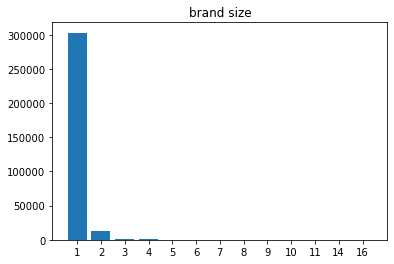

In [104]:
left = np.array(brand_freq.index)
height = brand_freq.values
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.bar(range(0, left.size), height, tick_label=[str(s) for s in left])
# plt.yscale('log')
plt.title('brand size')
plt.show()

# 推薦

原理
```
同品牌的頃向 = 購買比例的標準差
```


In [189]:
threshold = 0.0423
user_brand_meta_lt_threshold = user_brand_meta[user_brand_meta['list_normal_std'] < threshold]
user_brand_meta_gte_threshold = user_brand_meta[user_brand_meta['list_normal_std'] >= threshold]

lt_threshold_user_ids = user_brand_meta_lt_threshold.index.tolist()
gte_threshold_user_ids = user_brand_meta_gte_threshold.index.tolist()

ratings_trainings_with_brands = ratings_trainings_with_meta[['reviewerID', 'brand']].groupby(['reviewerID']).agg(list)

In [192]:
ratings_trainings_with_brands

,brand
reviewerID,
A0010876CNE3ILIM9HV0,[illunt]
A001170867ZBE9FORRQL,"[Wazor, ]"
A0028738FYF1SKPPC7B1,[Indian Earth]
A0045356A23634W7RI4M,[GENERIC]
A006277084SDH2LTUV6X,[]
...,...
AZZW8CF93X1TC,[Technic]
AZZWNU4RB5BY1,[BAISIDAI]
AZZXKG9AGRVGU,[]


In [206]:
# [[ratings_trainings_with_brands.index[0]]]
#

user_to_brands = { user_id: ratings_trainings_with_brands['brand'][user_id] for user_id in ratings_trainings_with_brands.index }

In [313]:
user_to_brands

recommendations = {}
all_meta = metadata[['brand', 'asin']]

count_no_brands = 0
count_same_brands = 0
count_not_same_brands = 0
count_default_brands = 0

k = 10
for user in users:
    if user not in user_to_brands:
        count_no_brands += 1
        # default: 從過去的購買清單選
        recommendations[user] = ratings_trainings_with_meta['asin'].sample(n=k).tolist()
    else:
        bought_brands = user_to_brands[user]
        if user in lt_threshold_user_ids:
            count_same_brands += 1
            # 推薦同品牌
            rec_list = ratings_trainings_with_meta[ratings_trainings_with_meta['brand'].isin(bought_brands)]['asin']
            take_n = np.min([k, len(rec_list)])
            recommendations[user] = rec_list.sample(n=take_n).tolist()
            # 不夠的，從過去的購買清單選
            if (k - take_n) > 0:
                recommendations[user] += ratings_trainings_with_meta[~ratings_trainings_with_meta['brand'].isin(bought_brands)]['asin'].sample(n=k - take_n).tolist()
        elif user in gte_threshold_user_ids:
            count_not_same_brands += 1
            # 推薦不同品牌，除了已買的
            rec_list = ratings_trainings_with_meta[~ratings_trainings_with_meta['brand'].isin(bought_brands)]['asin']
            recommendations[user] = rec_list.sample(n=np.min([k, len(rec_list)])).tolist()
        else:
            count_default_brands += 1
            # 沒有品牌，隨意
            recommendations[user] = ratings_trainings_with_meta['asin'].sample(n=k).tolist()

print('count_no_brands: %s\ncount_same_brands: %s\ncount_not_same_brands: %s\ncount_default_brands: %s' % (count_no_brands, count_same_brands, count_not_same_brands, count_default_brands))
# recommendations
# recommendations = {user: ratings_trainings['asin'].sample(n=k).tolist() for user in users}

count_no_brands: 546
count_same_brands: 38
count_not_same_brands: 0
count_default_brands: 0


In [314]:
evaluate(ratings_testings_by_user, recommendations)
# ratings_testings_by_user
# ratings_testings_by_user
# recommendations
# ratings_testings_by_user['A100XQFWKQ30O2']

0.005084745762711864

In [291]:
len(users)

584